In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.signal import find_peaks
import SAED
from numpy.polynomial import Polynomial

In [73]:
img_full = plt.imread(os.path.join(os.getcwd(), 'data', 'lab6_source.png'))
print(img_full[100,200,:])
print(img_full.shape)
img = img_full[50:910,400:1230,0].T
print(f'{img.shape=}')

[0.03137255 0.03137255 0.03137255 1.        ]
(1036, 1377, 4)
img.shape=(830, 860)


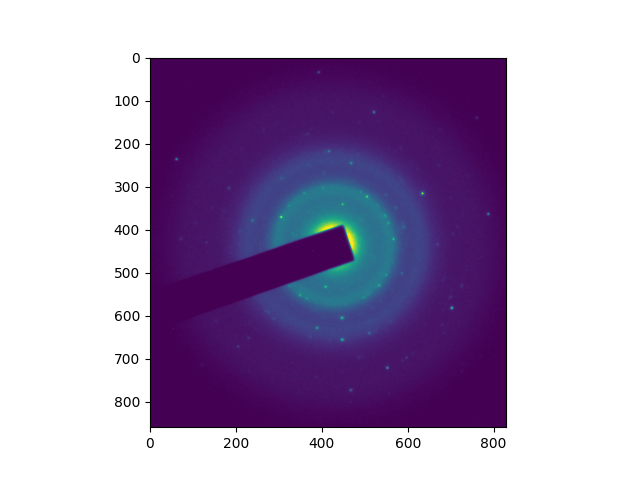

In [54]:
fig, ax = plt.subplots()
ax.imshow(img.T)
fig.canvas.toolbar_visible = True
#display(fig)
center = (427,439)
# pixels per 1/nm
scale = 40.4
plt.imsave(os.path.join(os.getcwd(),'source.png'),img.T,dpi=400)


Spectrum calculated


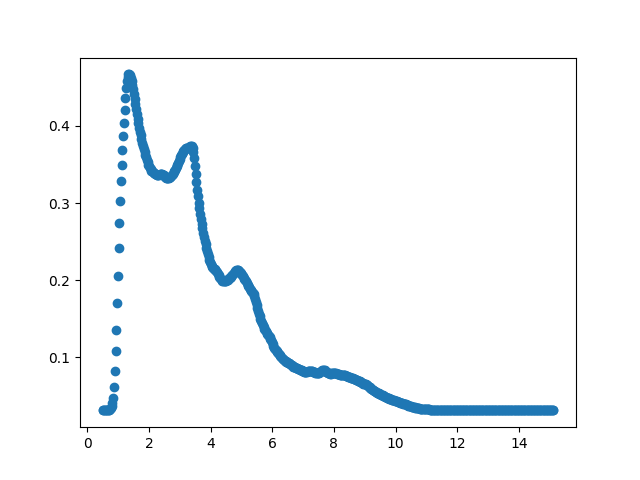

In [4]:
x = np.arange(-center[0], img.shape[0] - center[0])
y = np.arange(-center[1], img.shape[1] - center[1])
xs, ys = np.meshgrid(x, y, sparse=True, indexing='ij')
zs = np.sqrt(xs**2 + ys**2)

res = SAED.calc_spectrum(img,zs,40.4)
plt.subplots()
plt.scatter(res[:,0],res[:,1])

35
0.46666439777145735
len(peaks)=17


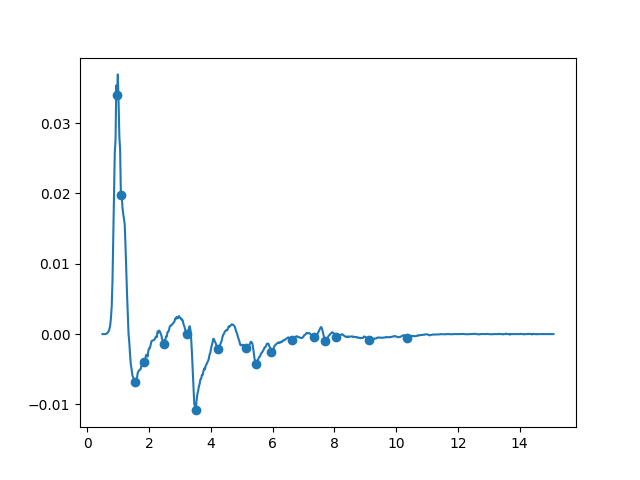

In [48]:
fit_start = np.argmax(res[:,1])
print(fit_start)
print(res[fit_start,1])
fit = Polynomial.fit(res[fit_start:,0], res[fit_start:,1], 4)
fitted = fit(res[fit_start:,0])
fix, ax = plt.subplots()
bg_corr = res[:,1] - fit(res[:,0])
diff = np.diff(res[:,1])
#plt.plot(res[:,0], res[:,1], res[:,0], bg_corr, res[:-1,0], diff)
plt.plot(res[:-1,0], diff)
peaks, _ = find_peaks(-diff, prominence=0.0003)
print(f'{len(peaks)=}')
plt.scatter(res[peaks,0], diff[peaks])

peak_manual[3]=188
(830, 860, 4)
[0.03137255 0.03137255 0.03137255 1.        ]


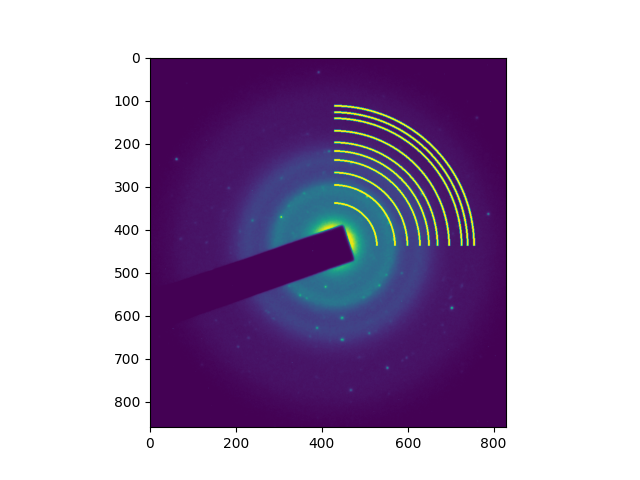

In [84]:
width = 5

# x = np.arange(-opt_cent[1], img.shape[1] - opt_cent[1])
# y = np.arange(-opt_cent[0], img.shape[0] - opt_cent[0])
# xs, ys = np.meshgrid(x, y, sparse=True)
# zs = np.sqrt(xs**2 + ys**2)

img_peaks = img.copy()
peak_manual = peaks[4:]
peak_manual = np.delete(peak_manual, 1)
print(f'{peak_manual[3]=}')
peak_manual[3] = 180
peak_manual = peak_manual[:-2]
for x in peak_manual:
    ring = np.ones(zs.shape)
    ring[zs < (res[x,0]*scale - width/2)] = 0
    ring[zs > (res[x,0]*scale + width/2)] = 0
    img_peaks[(ring>0)*(xs>0)*(ys<0)] = 1
plt.subplots()
img_grey = np.repeat(img.T[:,:,np.newaxis],4,axis=2)
img_grey[:,:,3] = 1
img_grey = img_grey.swapaxes(1,0)
print(img_grey.shape)
print(img_grey[100,100,:])
plt.imshow(img_peaks.T)
plt.imsave(os.path.join(os.getcwd(),'source.png'),img_grey.swapaxes(1,0),dpi=400)

In [87]:
np.savetxt(os.path.join(os.getcwd(),'lab6_peaks.txt'),res[peak_manual,0], header='Values in 1/nm')